In [16]:
%load_ext autoreload
%autoreload 2
%cd /mnt/activeCell-ACDC
!ls

import json
import random as rd
import matplotlib.image as mpimg
import cv2
import wandb
import torch
import os
import logging
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from detectron2.utils.visualizer import Visualizer
from detectron2.utils.logger import setup_logger
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultPredictor
from detectron2.checkpoint import DetectionCheckpointer

from src.globals import *
from utils.visualization.show_image import show_image
from utils.register_datasets import register_datasets, get_dataset_name
from utils.config_builder import get_config
from utils.notebook_utils import *


from src.test import do_test
from src.active_learning.al_trainer import *
from src.active_learning.mc_dropout_sampler import *


logger = setup_logger(output="./log/main.log",name="null_logger") 
logger.addHandler(logging.NullHandler())
logging.getLogger('detectron2').setLevel(logging.WARNING)
logging.getLogger('detectron2').addHandler(logging.NullHandler())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/mnt/activeCell-ACDC
README.md    data		nohup.out  pipeline_configs  src
ac_acdc_env  jupyter_notebooks	notebooks  requirements.txt  utils
al_output    log		output	   shell_scripts     wandb


In [3]:
df = pd.read_csv("jupyter_notebooks/results/uncertainties_vs_drop_prob.csv")

In [4]:
df.head()

,Unnamed: 0,num_mc_samples,dropout_prob,model_train_size,image_id,run_id,agg_uncertainty
0,0,20,0.05,270,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,0,0.0
1,1,20,0.05,270,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,1,0.0
2,2,20,0.05,270,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,2,0.0
3,3,20,0.05,270,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,3,0.0
4,4,20,0.05,270,TimeLapse_2D_MIA_KC_htb1_mCitrine_labeled_pos_5_0,4,0.0


In [21]:
mean_var_df = df[["dropout_prob", "image_id","agg_uncertainty"]].groupby(by=["dropout_prob", "image_id"]).agg("var").reset_index()[["dropout_prob","agg_uncertainty"]].groupby(by=["dropout_prob"]).agg("mean")
var_mean_df = df[["dropout_prob", "image_id","agg_uncertainty"]].groupby(by=["dropout_prob", "image_id"]).agg("mean").reset_index()[["dropout_prob","agg_uncertainty"]].groupby(by=["dropout_prob"]).agg("var")

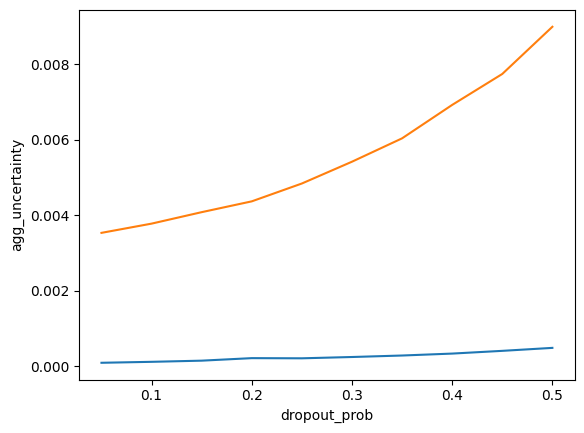

In [25]:
plot = sns.lineplot(data=mean_var_df, x="dropout_prob", y="agg_uncertainty")
plot = sns.lineplot(data=var_mean_df, x="dropout_prob", y="agg_uncertainty")
#plot.set(yscale='log')

